##Import Libraries

In [67]:
# TensorFlow and tf.keras
import tensorflow as tf

from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 
import numpy as np
import pandas as pd
import numpy.random as r # We will randomly initialize our weights
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
%matplotlib inline

##Load Data

In [68]:
# TODO: Turn this into a fuction so we can do many stocks quickly
def loadData(filename):
  ticker= pd.read_csv(filename)

  # Create New Feature 'Days Since Start' for temporal data
  start_date = datetime.strptime(ticker.values[0,1], "%Y-%m-%d")
  days_since = np.zeros(ticker.values.shape[0])

  for i in range(len(days_since)):
      curr_date = datetime.strptime(ticker.values[i,1], "%Y-%m-%d")
      diff = curr_date - start_date
      
      
      days_since[i] = diff.days

  X = np.hstack((np.hstack((ticker.values[:,2:6],ticker.values[:,7:])), days_since.reshape(-1,1)))
  ticker_date = ticker.values[:,1]

  # Target is close_adj
  y = ticker.values[:,6]


  return X, y, ticker_date

Xmsft, ymsft, datemsft = loadData('msft.csv')
Xmrna, ymrna, datemrna = loadData('mrna.csv')



##Train Test Split

In [69]:
Xmsft_train, Xmsft_test, ymsft_train, ymsft_test = train_test_split(Xmsft, ymsft, test_size=0.2, shuffle=False)
Xmrna_train, Xmrna_test, ymrna_train, ymrna_test = train_test_split(Xmrna, ymrna, test_size=0.2, shuffle=False)

##Scale

In [70]:
msft_scaler = StandardScaler().fit(Xmsft_train)
mrna_scaler = StandardScaler().fit(Xmrna_train)

# Scale $MSFT
Xmsft_train_sc = msft_scaler.transform(Xmsft_train)
Xmsft_test_sc = msft_scaler.transform(Xmsft_test)

# Scale $MRNA
Xmrna_train_sc = mrna_scaler.transform(Xmrna_train)
Xmrna_test_sc = mrna_scaler.transform(Xmrna_test)

##Creating the Neural Network

In [71]:
model = tf.keras.Sequential([
  tf.keras.Input(shape=(7)),
  tf.keras.layers.Dense(102, activation='relu'),
  tf.keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse','mae'])

model.summary()

Xmsft_train_sc = np.asarray(Xmsft_train_sc).astype(np.float32)
Xmsft_test_sc = np.asarray(Xmsft_test_sc).astype(np.float32)
ymsft_train = np.asarray(ymsft_train).astype(np.float32)
ymsft_test = np.asarray(ymsft_test).astype(np.float32)

print(Xmsft_train_sc)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 102)               816       
                                                                 
 dense_50 (Dense)            (None, 1)                 103       
                                                                 
Total params: 919
Trainable params: 919
Non-trainable params: 0
_________________________________________________________________
[[-1.398585   -1.3865551  -1.3930475  ... -0.06812607  0.
  -1.7344365 ]
 [-1.3588257  -1.3521771  -1.3613209  ...  0.2828455   0.
  -1.7318416 ]
 [-1.3488183  -1.3471137  -1.3521187  ... -0.04225528  0.
  -1.7292465 ]
 ...
 [ 2.7850661   2.7286706   2.7896466  ... -0.18063395  0.
   1.722125  ]
 [ 2.8083265   2.7745078   2.6638389  ...  0.7217626   0.
   1.7299101 ]
 [ 2.582483    2.5892932   2.5410528  ...  0.6824489   0.
   1.7325051 ]]


In [72]:
print(Xmsft_train_sc.shape)
print(ymsft_train[0])

(919, 7)
58.3529


## Train the model

In [73]:
history = model.fit(Xmsft_train_sc, ymsft_train, epochs=100)

Epoch 1/100
29/29 [==============================] - 0s 2ms/step - loss: 13459.5781 - mse: 13459.5781 - mae: 109.8109
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 13170.7432 - mse: 13170.7432 - mae: 108.5876
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 12814.9980 - mse: 12814.9980 - mae: 107.0500
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 12336.1934 - mse: 12336.1934 - mae: 105.0009
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 11760.7969 - mse: 11760.7969 - mae: 102.4328
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 11061.3232 - mse: 11061.3232 - mae: 99.2557
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 10267.6445 - mse: 10267.6445 - mae: 95.4899
Epoch 8/100
29/29 [==============================] - 0s 2ms/step - loss: 9407.1152 - mse: 9407.1152 - mae: 91.1401
Epoch 9/100
29/29 [==============================] - 0s 2ms/s

dict_keys(['loss', 'mse', 'mae'])


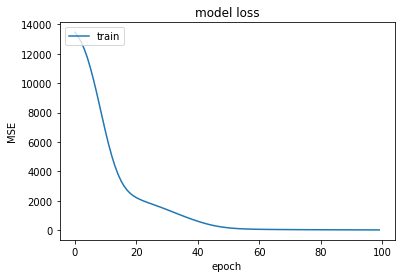

In [76]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

##Prediction

In [77]:
prediction = model.predict(Xmsft_test_sc)

In [78]:
print(prediction)

[[213.45749]
 [209.49338]
 [208.5264 ]
 [213.17183]
 [216.13098]
 [215.20988]
 [209.932  ]
 [205.43652]
 [208.53033]
 [210.21262]
 [212.09193]
 [209.19286]
 [208.15515]
 [219.73619]
 [218.78122]
 [220.61958]
 [220.94037]
 [220.79442]
 [215.90247]
 [211.72263]
 [214.75267]
 [218.26218]
 [219.33759]
 [220.13516]
 [220.66634]
 [218.58401]
 [220.4196 ]
 [221.5301 ]
 [223.19595]
 [224.8415 ]
 [227.67754]
 [232.44508]
 [239.57292]
 [236.65166]
 [237.18187]
 [239.93204]
 [229.84007]
 [220.21843]
 [212.71487]
 [218.35922]
 [217.74953]
 [213.909  ]
 [215.0937 ]
 [219.83607]
 [217.44576]
 [211.04468]
 [208.43716]
 [208.78189]
 [215.23628]
 [213.6634 ]
 [211.86401]
 [215.92998]
 [220.39157]
 [219.67407]
 [219.3904 ]
 [223.9219 ]
 [217.97678]
 [221.83667]
 [218.26047]
 [220.08278]
 [223.84276]
 [225.53085]
 [231.31732]
 [235.4086 ]
 [235.52148]
 [232.06091]
 [233.53918]
 [230.16069]
 [229.00403]
 [228.4092 ]
 [228.1544 ]
 [230.54189]
 [223.66422]
 [224.3696 ]
 [216.02213]
 [217.15973]
 [214.19292]

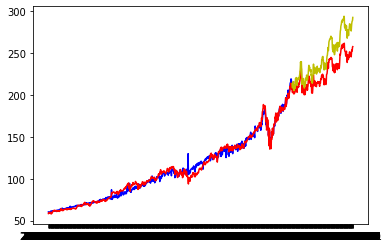

In [84]:
# Train prediction
train_pred = model.predict(Xmsft_train_sc)

plt.plot(msft_date[0:919],train_pred, 'b-')
plt.plot(msft_date, ymsft, 'r-')
plt.plot(msft_date[919:], prediction, 'y-')